In [82]:
# Don't care. It's just a command for gist update
run(`gist -u https://gist.github.com/KeitaW/3a6eed199996cb06887ffbf416eb9a05 optimization_method.ipynb`)

https://gist.github.com/3a6eed199996cb06887ffbf416eb9a05


In [18]:
using PyPlot

# Gradient Descent

とりあえず２変数のシンプルなGradient Descent Algorithmから書いてみる

In [19]:
derivative_x = (f; Δ=1e-04) -> (x, y) -> (f(x+Δ, y) - f(x-Δ, y) ) / 2Δ
derivative_y = (f; Δ=1e-04) -> (x, y) -> (f(x, y+Δ) - f(x, y-Δ) ) / 2Δ
derivative_xx = (f; Δ=1e-04) -> (x, y) -> (derivative_x ∘ derivative_x)(f)(x, y)
derivative_xy = (f; Δ=1e-04) -> (x, y) -> (derivative_x ∘ derivative_y)(f)(x, y)
derivative_yx = (f; Δ=1e-04) -> (x, y) -> (derivative_y ∘ derivative_x)(f)(x, y)
derivative_yy = (f; Δ=1e-04) -> (x, y) -> (derivative_y ∘ derivative_y)(f)(x, y)
grad = (f; Δ=1e-04) -> (x, y) -> [derivative_x(f)(x, y) derivative_y(f)(x, y)]
hessian = (f; Δ=1e-04) -> (x, y) -> [derivative_xx(f)(x, y) derivative_yx(f)(x, y);
                                        derivative_xy(f)(x, y) derivative_yy(f)(x, y)];

In [20]:
f(x, y) = 3x^2 + 5y^2 -6x*y
fx = derivative_x(f); fy = derivative_y(f);
∇f = grad(f); Hf = hessian(f);

In [22]:
til = 10
x_min, x_max, y_min, y_max = -til, til, -til, til
npoints = 1000
xs = linspace(x_min, x_max, npoints); ys = linspace(x_min, x_max, npoints);

In [23]:
fval = zeros(npoints, npoints);
for (row, x) in enumerate(xs) for (col, y) in enumerate(ys) fval[row, col] = f(x, y) end end

In [24]:
xgrid = repmat(xs', npoints, 1); ygrid = repmat(ys, 1, npoints);

In [25]:
draw_contour = function (ax) 
    cp = ax[:contour](xgrid, ygrid, fval, levels=[0, 5, 10, 20, 50, 100, 200, 500])
    ax[:clabel](cp, inline=1, fontsize=10)
    ax[:set_xlim](-til, til); ax[:set_ylim](-til, til)
    return(ax)
end

(::#129) (generic function with 1 method)

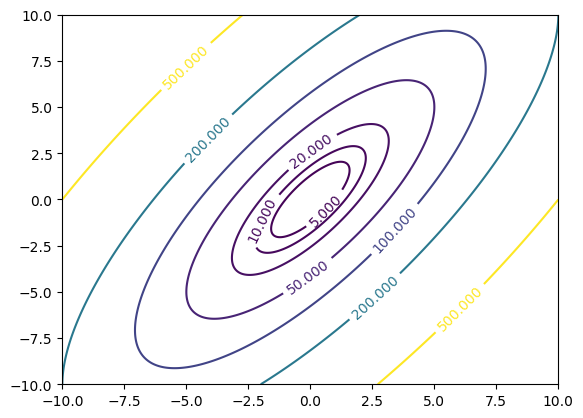

PyObject <matplotlib.axes._subplots.AxesSubplot object at 0x124ad9ac8>

In [26]:
fig, ax = subplots(1, 1)
draw_contour(ax)

In [27]:
function gradient_descent(f, x0, y0; η=1e-04, maxiter=1e+04, tol=1e-04)
    gradient_descent_1step = (func, η_) -> pos -> pos .- η_.*grad(func)(pos[1], pos[2])
    post_f = gradient_descent_1step(f, η)
    pos = [x0 y0];  pos_list = pos
    for iter in 1:maxiter
        pos_prev = pos
        pos = post_f(pos_prev)
        pos_list = [pos_list; pos]
        abs(f(pos[1], pos[2]) - f(pos_prev[1], pos_prev[2])) <= tol && return (iter, pos_list)
    end
    warn("Iteration limit exceeded !")
    return(maxiter, pos_list)
end

gradient_descent (generic function with 1 method)

In [28]:
draw_trace = function (ax, poss)
    ax[:plot](poss[1, 1], poss[1, 2], color="r", marker="x")
    ax[:plot](poss[1:end-1, 1], poss[1:end-1, 2], "b-o")
    ax[:plot](poss[end, 1], poss[end, 2], "r", marker="o")
    return ax
end

(::#138) (generic function with 1 method)

In [29]:
niter, pos_list = gradient_descent(f, 2.5, 7.5; tol=1e-03);
@show niter;

niter = 7301.0

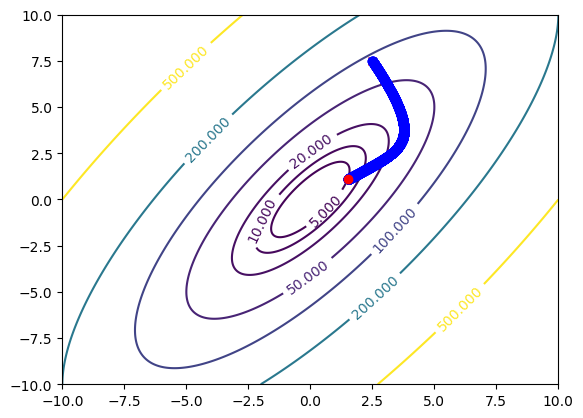

PyObject <matplotlib.axes._subplots.AxesSubplot object at 0x124c77978>

In [30]:
fig, ax = subplots(1, 1)
draw_trace(draw_contour(ax), pos_list)

In [31]:
niter, pos_list = gradient_descent(f, 2.5, 7.5; tol=1e-03, η=1.3e-01);
@show niter;

niter = 37.0


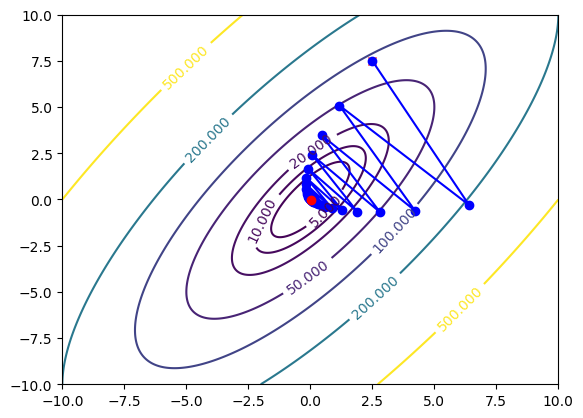

PyObject <matplotlib.axes._subplots.AxesSubplot object at 0x124c152b0>

In [32]:
fig, ax = subplots(1, 1)
draw_trace(draw_contour(ax), pos_list)

In [33]:
niter, pos_list = gradient_descent(f, 2.5, 7.5; tol=1e-03, η=1.5e-01);
@show niter;

niter = 10000.0


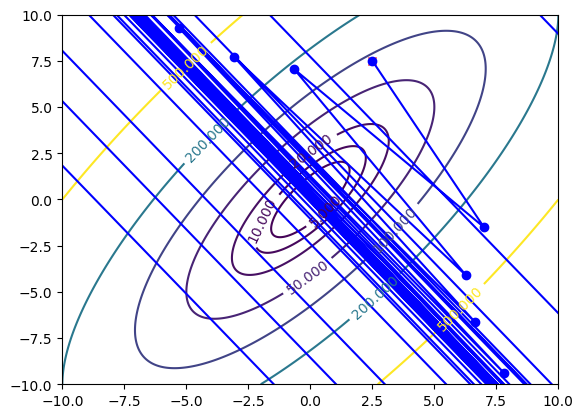

PyObject <matplotlib.axes._subplots.AxesSubplot object at 0x113de1128>

In [34]:
fig, ax = subplots(1, 1)
draw_trace(draw_contour(ax), pos_list)

## 今後も使いたいルーチンなのでN次元にも適用可能なように拡張する

In [35]:
move_delta = function (x, i, Δ)
    x[i] += Δ
    return x
end
# 第i成分で微分
derivative_xi = (i) -> (f; Δ=1e-04) -> (x)  -> (f(move_delta(x, i, Δ)) - f(move_delta(x, i, -Δ))) / 2Δ

# Gradient at x
∇ = (f; Δ=1e-04) -> (x) -> map(i -> derivative_xi(i)(f)(x), 1:length(x))
run_2d = (dim) -> ((i, j) for i in 1:dim for j in 1:dim)
# Hessian Matrix at x
H = (f; Δ=1e-04) -> (x) -> reshape(
    map(dim -> (derivative_xi(dim[1]) ∘ derivative_xi(dim[2]))(f)(x), run_2d(length(x))), length(x), length(x))

(::#163) (generic function with 1 method)

In [66]:
gradient_descent_optimizer = (f ;η=1e-04) -> x -> x .- η.*∇(f)(x)

(::#211) (generic function with 1 method)

更新式パート(optimizer)と実際の更新を行う部分を分離して実装している．こうすると学習アルゴリズム毎にいちいち同じコードを書かなくて良くなるので嬉しい．
DRY

In [69]:
optimize = (optimizer) -> function (f, x; η=1e-03, maxiter=1e+04, tol=1e-04)
    post_f = optimizer(f, η=η)
    pos = x;  pos_list = pos'
    for iter in 1:maxiter
        pos_prev = pos
        pos = post_f(pos_prev)
        pos_list = [pos_list; pos']
        abs(f(pos) - f(pos_prev)) <= tol && return (iter, pos_list)
    end
    warn("Iteration limit exceeded!")
    return(maxiter, pos_list)
end

(::#224) (generic function with 1 method)

In [68]:
f(x) = 3.0x[1]^2 + 5.0*x[2]^2 - 6.0x[1]*x[2]

f (generic function with 2 methods)

In [77]:
@time niter, pos_list = optimize(gradient_descent_optimizer)(f, [2.5, 7.5]; tol=1e-03)

  0.265835 seconds (392.18 k allocations: 53.501 MiB, 7.61% gc time)


(2421.0, [2.5 7.5; 2.515 7.47; … ; 0.684376 0.493251; 0.683803 0.492838])

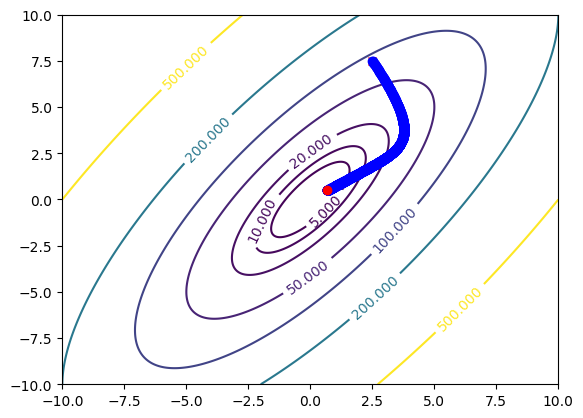

PyObject <matplotlib.axes._subplots.AxesSubplot object at 0x125248da0>

In [72]:
fig, ax = subplots(1, 1)
draw_trace(draw_contour(ax), pos_list)

# Newton's method

In [73]:
newton_optimizer = (f; η=1e-04) -> x -> x .- (inv(H(f)(x)) / det(H(f)(x))) * ∇(f)(x)

(::#230) (generic function with 1 method)

In [78]:
@time niter, pos_list = optimize(newton_optimizer)(f, [2.5, 7.5]; tol=1e-03)

  0.001139 seconds (5.84 k allocations: 142.172 KiB)


(7.0, [2.5 7.5; -0.833659 -2.50025; … ; 0.0031797 0.0100883; -0.00139323 -0.00362944])

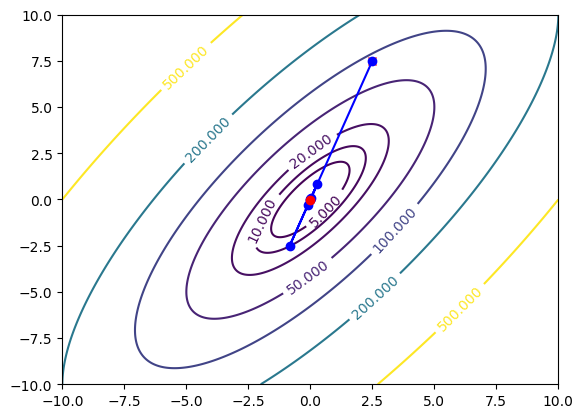

PyObject <matplotlib.axes._subplots.AxesSubplot object at 0x126cb6518>

In [76]:
fig, ax = subplots(1, 1)
draw_trace(draw_contour(ax), pos_list)